In [1]:
# Importing required packages
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
import rfpimp
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
#Loading the data and checking for missing values
dataset=pd.read_csv('C:/Users/ictinike/Documents/WrayLab/raw_data/x_0011_df_phyloP.csv')
dataset.isnull().sum()

datasetv2 = dataset.dropna(axis=1)
datasetv2.isnull().sum()
# Checking the data set for any NULL values is very essential, as MLAs can not 
# handle NULL values. We have to either eliminate the records with NULL values 
# or replace them with the mean/median of the other values. we can see each of 
# the variables are printed with number of null values. This data set has no null 
# values so all are zero here.

seqnames                  0
start                     0
end                       0
width                     0
strand                    0
                         ..
gene.y                    0
dTSS                      0
PhastCons                 0
PhyloP_primates_score     0
PhyloP_placental_score    0
Length: 90, dtype: int64

In [3]:
test=datasetv2.iloc[1:50,::]

In [4]:
df2=pd.read_csv('C:/Users/Ictinike/Documents/WrayLab/raw_data/OCRs_inTADs.csv')
df2.isnull().sum()

seqnames                  0
start                     0
end                       0
width                     0
strand                    0
                         ..
PhyloP_placental_score    0
TAD_chr                   0
TAD_start                 0
TAD_end                   0
TAD_ID                    0
Length: 145, dtype: int64

In [46]:
df2

,seqnames,start,end,width,strand,name,score,signalValue,pValue,qValue,...,gene.y,dTSS,PhastCons,PhyloP_mammals_score,PhyloP_primates_score,PhyloP_placental_score,TAD_chr,TAD_start,TAD_end,TAD_ID
0,chr1,10002454,10002744,291,*,chr1.1621,580,0.0447,2.50,-1,...,LZIC,788,0.0010,-0.187286,0.072259,0.096919,chr1,9600000,10160000,ID_33
1,chr1,10002454,10002744,291,*,chr1.1621,580,0.0447,2.50,-1,...,LZIC,788,0.0010,-0.187286,0.072259,0.096919,chr1,9950000,10160000,ID_35
2,chr1,10002889,10003898,1010,*,chr1.1622,1000,0.2851,16.00,-1,...,LZIC,-7,0.0000,-0.080751,-0.035778,-0.073589,chr1,9600000,10160000,ID_33
3,chr1,10002889,10003898,1010,*,chr1.1622,1000,0.2851,16.00,-1,...,LZIC,-7,0.0000,-0.080751,-0.035778,-0.073589,chr1,9950000,10160000,ID_35
4,chr1,10010376,10010795,420,*,chr1.1623,771,0.1051,6.12,-1,...,NMNAT1,7100,0.0010,-0.489835,-0.016843,0.102150,chr1,9600000,10160000,ID_33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71041,chrX,9488022,9488190,169,*,chrX.145,532,0.0292,1.59,-1,...,TBL1X,55058,0.0000,-0.578548,0.049779,-0.088180,chrX,8740000,9710000,ID_8998
71042,chrX,9498770,9499314,545,*,chrX.146,961,0.1655,9.78,-1,...,TBL1X,65994,0.0020,-0.037378,-0.025550,-0.186445,chrX,8740000,9710000,ID_8998
71043,chrX,9614636,9615036,401,*,chrX.149,640,0.0637,3.63,-1,...,GPR143,119168,0.0000,-0.495529,-0.045406,-0.388642,chrX,8740000,9710000,ID_8998
71044,chrX,9638240,9638440,201,*,chrX.150,548,0.0343,1.89,-1,...,GPR143,95664,0.0775,-0.772330,0.020883,0.022453,chrX,8740000,9710000,ID_8998


In [5]:
test=df2.iloc[1:5000,::]

In [6]:
# here we'll start by using wgCERES_score_nosig as the response vector,
x = test[["DHS_prop_repeat", 
                    "DHS_prop_GC", "DHS_length", "n_SNV_Zhou_per_bp", 
                    "distanceToTSS", "zeta.human", "zeta.chimp", "PP_con", "PP_acc", 
                    "PhastCons",
                    "chromHMM_cat_longest", 
                    "annotation", "PhyloP_primates_score"]]
y = test["wgCERES_score_nosig"]
x = pd.get_dummies(x, columns = ['chromHMM_cat_longest','annotation'])

In [7]:
random_state=None

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [59]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [60]:
imp = rfpimp.importances(rf, x_test, y_test)

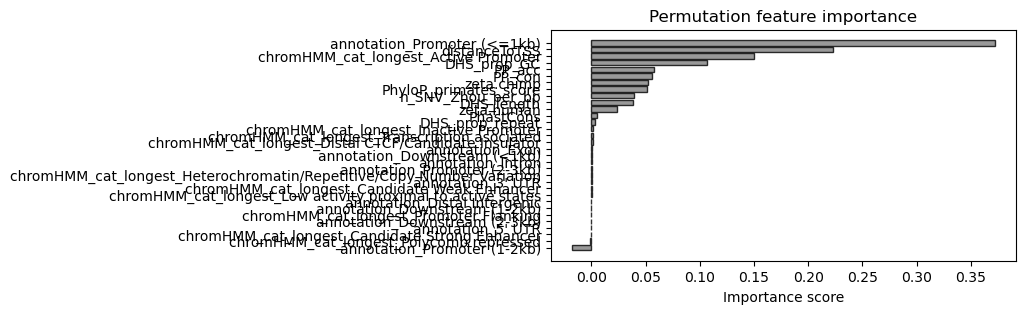

In [61]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
#ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
#        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

#fig.tight_layout()

C:\Users\Ictinike\anaconda3\lib\site-packages\rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


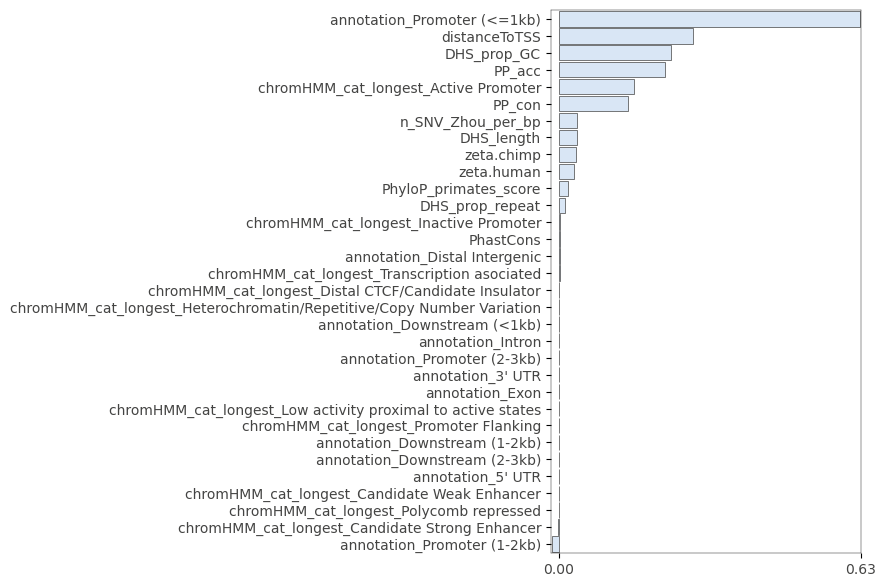

In [62]:
imp = rfpimp.importances(rf, x_test, y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

In [12]:
lm  = LinearRegression()
gbm = GradientBoostingRegressor()
#lr = LogisticRegression()
rf = RandomForestRegressor()
sv = SVR()

In [13]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=20,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=0)

In [94]:
ransac.fit(x, y)
lm.fit(x, y)
rf.fit(x,y)
gbm.fit(x, y)
sv.fit(x, y)

SVR()

In [96]:
ran_pred=ransac.predict(x_test)
sv_pred=sv.predict(x_test)
lm_pred=lm.predict(x_test)
gbm_pred=gbm.predict(x_test)

In [98]:
ran_mae = mean_absolute_error(ran_pred, y_test)
ran_rmse = np.sqrt(mean_squared_error(ran_pred, y_test))
print("ran MAE: {:.2f}".format(round(ran_mae, 2)))
print("ran RMSE: {:.2f}".format(round(ran_rmse, 2)))

ran MAE: 1.21
ran RMSE: 2.11


In [97]:
lm_mae = mean_absolute_error(lm_pred, y_test)
lm_rmse = np.sqrt(mean_squared_error(lm_pred, y_test))
print("LM MAE: {:.2f}".format(round(lm_mae, 2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse, 2)))

LM MAE: 1.22
LM RMSE: 2.07


In [99]:
sv_mae = mean_absolute_error(sv_pred, y_test)
sv_rmse = np.sqrt(mean_squared_error(sv_pred, y_test))
print("LM MAE: {:.2f}".format(round(sv_mae, 2)))
print("LM RMSE: {:.2f}".format(round(sv_rmse, 2)))

LM MAE: 1.23
LM RMSE: 2.14


In [100]:
gbm_mae = mean_absolute_error(gbm_pred, y_test)
gbm_rmse = np.sqrt(mean_squared_error(gbm_pred, y_test))
print("LM MAE: {:.2f}".format(round(lm_mae, 2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse, 2)))

LM MAE: 1.22
LM RMSE: 2.07


In [70]:
sv.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'